In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

# Funções

## Medidas de Tendencia Central

In [2]:
def media(soma_X, quant_valores):
    resultado = soma_X / quant_valores

    return resultado

## Regressão Linear

In [3]:
def coef_angular(soma_X, soma_Y, soma_X_quad, soma_XY, quant_valores):
    numerador = soma_XY - ((soma_X * soma_Y) / quant_valores)
    denominador = soma_X_quad - (numpy.power(soma_X, 2) / quant_valores)
    
    return numerador / denominador

In [4]:
def coef_linear(soma_X, soma_Y, quant_valores, coef_angular):
    media_X = media(soma_X, quant_valores)
    media_Y = media(soma_Y, quant_valores)
    
    return media_Y - (coef_angular * media_X)

In [5]:
def reta_regressao(dados):
    SOMA_Y = sum(dados["Valor"])
    SOMA_X = sum(dados["Area"])

    SOMA_X_QUADRADO = sum(numpy.power(dados["Area"], 2))

    SOMA_XY = sum(dados["Valor"] * dados["Area"])
    
    QUANT_VALORES = len(dados.index)
    
    b = coef_angular(SOMA_X, SOMA_Y, SOMA_X_QUADRADO, SOMA_XY, QUANT_VALORES)
    a = coef_linear(SOMA_X, SOMA_Y, QUANT_VALORES, b)
    
    return a + b * dados["Area"]

In [6]:
def coef_correlacao(dados):
    SOMA_Y = sum(dados["Valor"])
    SOMA_X = sum(dados["Area"])

    SOMA_X_QUADRADO = sum(numpy.power(dados["Area"], 2))
    SOMA_Y_QUADRADO = sum(numpy.power(dados["Valor"], 2))
    
    SOMA_XY = sum(dados["Valor"] * dados["Area"])
    
    QUANT_VALORES = len(dados.index)
    
    # Semelhante ao que fizeram em cima, separei a fórmula em numerador e denominador
    numerador = SOMA_XY - (SOMA_X * SOMA_Y)/QUANT_VALORES 
    denominador_parte1 = SOMA_X_QUADRADO - (SOMA_X ** 2)/QUANT_VALORES # Decidi separar o denominador em 2 partes
    denominador_parte2 = SOMA_Y_QUADRADO - (SOMA_Y ** 2)/QUANT_VALORES 
    
    denominador_final = numpy.sqrt(denominador_parte1 * denominador_parte2)

    resultado = numerador/denominador_final
    
    return resultado

# Estudo de Dados

## Tratamento do Dataframe

In [7]:
tabela = pandas.read_csv("aluguel.csv", sep=";")

In [8]:
tabela.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Remoção de NaN

In [9]:
tabela[tabela["Valor"].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [10]:
tabela.dropna(subset = ['Valor'], inplace=True)

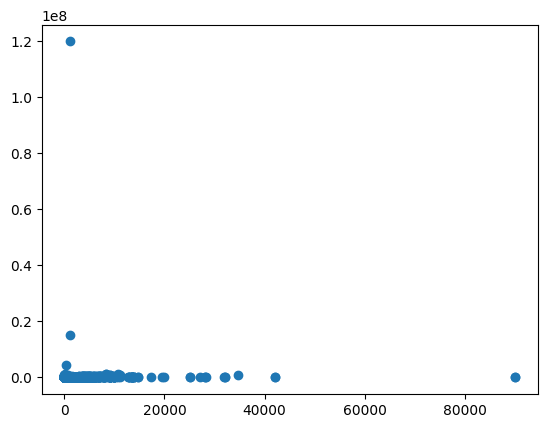

In [11]:
plt.scatter(tabela["Area"], tabela["Valor"])

### Teto de valores

In [12]:
tabela = tabela[tabela["Valor"] < 200000]
tabela = tabela[tabela["Area"] < 20000]

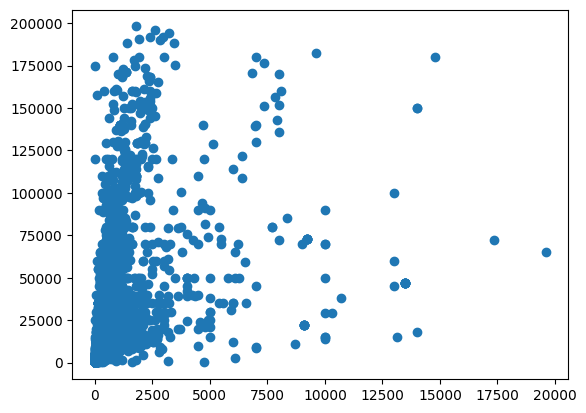

In [13]:
dispersao = plt.scatter(tabela["Area"], tabela["Valor"])

## Análise dos Dados

**Relação entre valor e Area**

In [14]:
tabela[['Tipo', 'Bairro', 'Area', 'Valor']]

,Tipo,Bairro,Area,Valor
0,Quitinete,Copacabana,40,1700.0
1,Casa,Jardim Botânico,100,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,150,5200.0
3,Apartamento,Centro,15,800.0
4,Apartamento,Higienópolis,48,800.0
...,...,...,...,...
32955,Quitinete,Centro,27,800.0
32956,Apartamento,Jacarepaguá,78,1800.0
32957,Apartamento,São Francisco Xavier,48,1400.0
32958,Apartamento,Leblon,70,3000.0


In [15]:
coef_correlacao(tabela)

0.5204727994233944

In [16]:
y = reta_regressao(tabela)

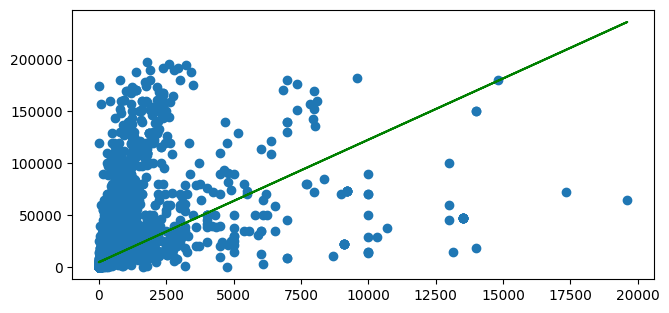

In [17]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
reta_regressao = plt.plot(tabela["Area"], y, c='green')
dispersao = plt.scatter(tabela["Area"], tabela["Valor"])